In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the data (use local CSV provided in the project)
df = pd.read_csv(r"c:\Users\madha\PycharmProjects\Elective_ML_2\PortalQuestions\Data\ML374_S6_Practice_BikeSales_Data.csv")
df.shape

(500, 18)

In [2]:
# ...existing code... (data loaded above) ...

# Prepare numeric columns and drop rows with missing Unit_Cost or Revenue
df['Unit_Cost'] = pd.to_numeric(df['Unit_Cost'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df_clean = df.dropna(subset=['Unit_Cost', 'Revenue']).copy()

X = df_clean[['Unit_Cost']].values  # 2D array for sklearn
y = df_clean['Revenue'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the feature (Unit_Cost)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Fit linear regression on scaled Unit_Cost
model = LinearRegression()
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)
residuals = y_test - y_pred

# Quick check numbers (optional)
print('Train size:', X_train_s.shape[0], 'Test size:', X_test_s.shape[0])
print('Slope (coef):', model.coef_[0], 'Intercept:', model.intercept_)

Train size: 375 Test size: 125
Slope (coef): 333.8084517073068 Intercept: 320.04266666666666


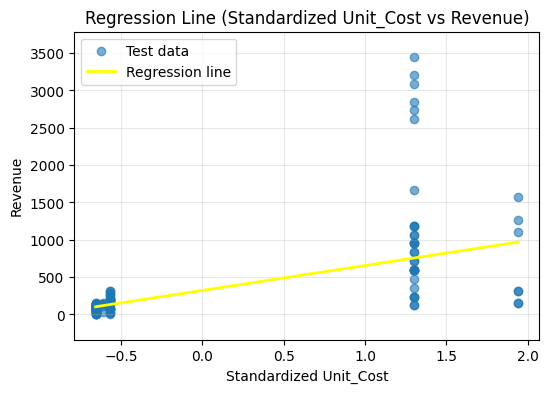

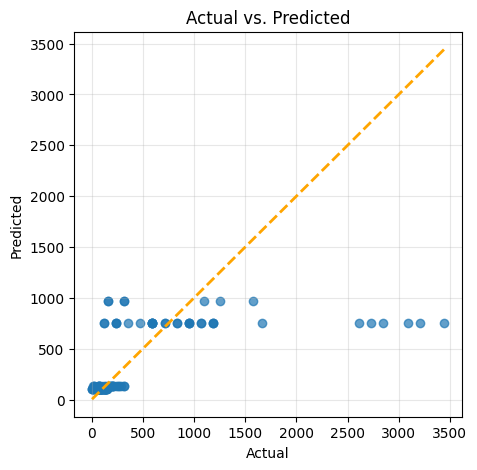

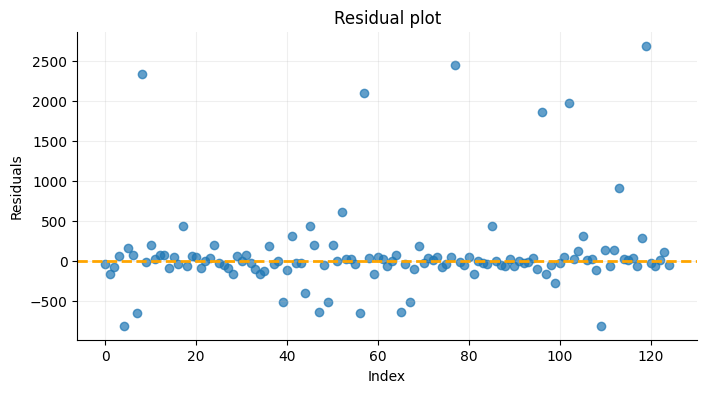

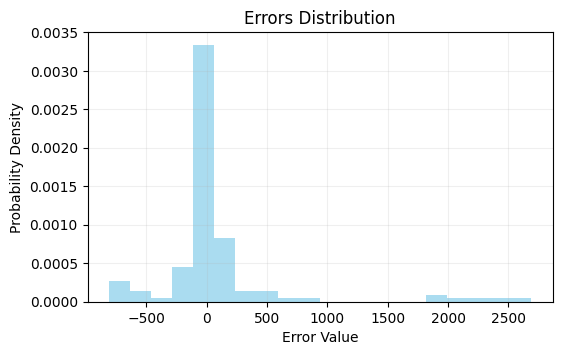

In [3]:
# Plot 1: Regression line and data points (standardized Unit_Cost vs Revenue)
plt.figure(figsize=(6,4))
plt.scatter(X_test_s.squeeze(), y_test, alpha=0.6, label='Test data')
# create a smooth line by sorting X_test_s
order = np.argsort(X_test_s.squeeze())
X_sorted = X_test_s.squeeze()[order].reshape(-1,1)
y_line = model.predict(X_sorted)
plt.plot(X_sorted, y_line, color='yellow', linewidth=2, label='Regression line')
plt.xlabel('Standardized Unit_Cost')
plt.ylabel('Revenue')
plt.title('Regression Line (Standardized Unit_Cost vs Revenue)')
# set y-limits with a small margin for clarity
ymin, ymax = y_test.min(), y_test.max()
margin = max(0.1, 0.1*(ymax - ymin))
plt.ylim(ymin - margin, ymax + margin)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot 2: Actual vs Predicted scatter with y=x reference (linearity / fit check)
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.7)
minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())
plt.plot([minv, maxv], [minv, maxv], linestyle='--', color='orange', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(alpha=0.3)
plt.show()

# Plot 3: Residuals vs Index (Homoscedasticity check)
plt.figure(figsize=(8,4))
ax = plt.gca()
ax.scatter(range(len(residuals)), residuals, alpha=0.7)
ax.axhline(0, color='orange', linestyle='--', linewidth=2)
ax.set_xlabel('Index')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
# remove top and right spines for readability
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.2)
plt.show()

# Plot 4: Distribution of residuals (error distribution)
plt.figure(figsize=(6,3.5))
plt.hist(residuals, bins=20, alpha=0.7, density=True, color='skyblue')
plt.title('Errors Distribution')
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.grid(alpha=0.2)
plt.show()

Interpretation:

- Regression line plot: shows how predicted Revenue changes with standardized Unit_Cost. If most test points lie near the line, the model is capturing a linear trend.
- Actual vs Predicted: points close to the diagonal y=x indicate good predictions. Systematic deviations (e.g., most points below/above the line) show bias.
- Residuals vs Index (Homoscedasticity): residuals should scatter randomly around zero with no visible funnel or pattern. A funnel shape or pattern indicates heteroscedasticity (non-constant variance).
- Residual histogram: errors should be approximately centered at zero and roughly symmetric if the normality assumption is acceptable. Strong skew or multiple modes suggests deviations from normality.

Next steps if assumptions fail: transform the target (e.g., log), add additional predictive features, or use heteroscedasticity-robust methods.